# 2章 教師あり学習
## 2.3 教師あり学習とアルゴリズム
### 2.3.5 決定木

In [33]:
import os
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
import graphviz

from preamble import *

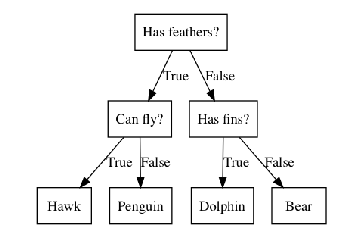

In [2]:
mglearn.plots.plot_animal_tree()

In [5]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=12)

In [6]:
tree = DecisionTreeClassifier(random_state=29)
tree.fit(X_train, y_train)

print('train score: ', tree.score(X_train, y_train))
print('test score', tree.score(X_test, y_test))

train score:  1.0
test score 0.8951048951048951


木の深さを制限して過学習を防ぐ

In [14]:
tree = DecisionTreeClassifier(max_depth=5, random_state=29)
tree.fit(X_train, y_train)

print('train score: ', tree.score(X_train, y_train))
print('test score', tree.score(X_test, y_test))

train score:  0.9953051643192489
test score 0.8951048951048951


#### 2.3.5.3 決定木の解析 

In [17]:
export_graphviz(
    tree, 
    out_file='tree.dot', 
    class_names = ['malignant', 'benign'], 
    feature_names=cancer.feature_names, 
    impurity=False, 
    filled=True
)

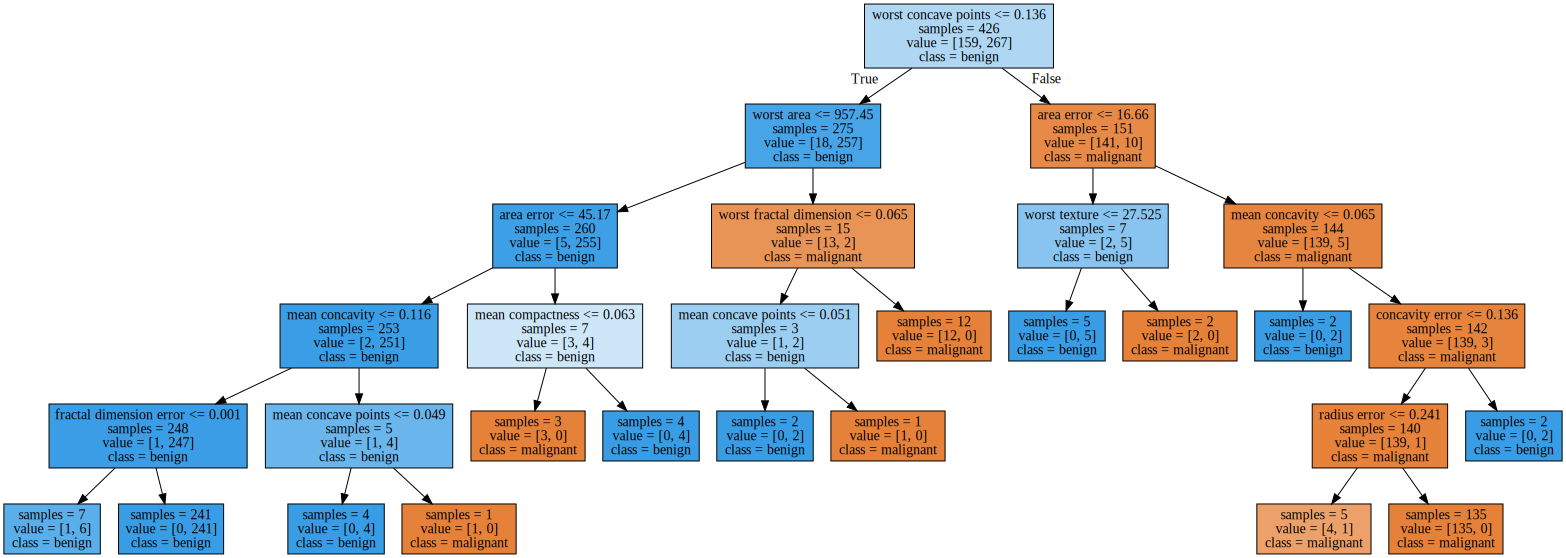

In [19]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

##### Interpretation
- `samples`: サンプルの個数
- `value`: クラスごとのサンプルの個数

#### 2.3.5.4 決定木の特徴量の重要性

In [23]:
print(tree.feature_importances_)

[0.    0.    0.    0.    0.    0.017 0.021 0.015 0.    0.    0.002 0.
 0.    0.044 0.    0.    0.02  0.    0.    0.001 0.    0.015 0.    0.104
 0.    0.    0.    0.75  0.    0.011]


In [26]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature')

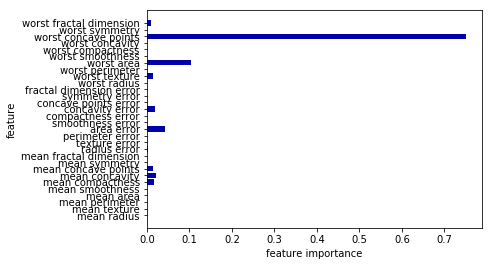

In [27]:
plot_feature_importances_cancer(tree)

特徴量とクラスの関係

Feature importances: [0. 1.]


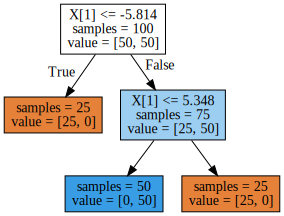

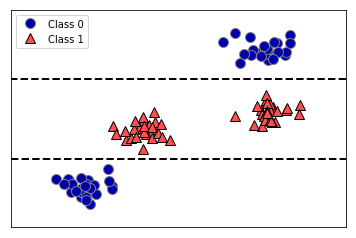

In [28]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

決定木の回帰モデルは外挿ができない

Text(0,0.5,'price in $/Mbyte')

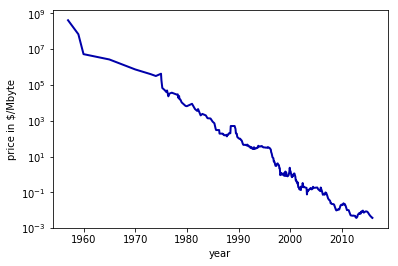

In [31]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel('price in $/Mbyte')

2000年までのデータを使ってそれ以降を予測

In [36]:
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 対数変換をもとに戻す
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

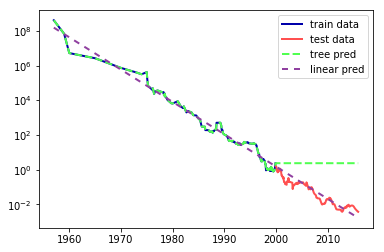

In [38]:
plt.semilogy(data_train.date, data_train.price, label="train data")
plt.semilogy(data_test.date, data_test.price, label="test data")            
plt.semilogy(ram_prices.date, price_tree, label="tree pred")            
plt.semilogy(ram_prices.date, price_lr, label="linear pred")            
plt.legend()

##### Interpretation
- 決定木
    - 学習データに完全に適合
    - 学習データにない領域は, 学習データの最後の予測と同じものを出力
- 線形モデル
    - 直線で近似